<a href="https://colab.research.google.com/github/Derrick-Majani/Weather/blob/main/WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
# Read in our data
import pandas as pd
import io
import os
import sys
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
# Use Local drives to upload the csv on google colab
from google.colab import files
uploaded = files.upload()

Saving model.csv to model.csv


In [5]:
weather=pd.read_csv('model.csv')
weather.head()

,entered_dt,cntr_id,call_typ,counts,tmin,tmax
0,1999-10-18,31.0,F,1,43.0,61.0
1,1999-11-01,31.0,F,1,49.0,69.0
2,1999-11-11,127.0,F,1,39.0,69.0
3,1999-12-01,246.0,F,1,46.0,69.0
4,2000-08-26,154.0,F,10,65.0,85.0


In [6]:
weather.tail()

,entered_dt,cntr_id,call_typ,counts,tmin,tmax
715853,2022-09-30,259.0,R,14,47.0,72.0
715854,2022-09-30,259.0,T,2,47.0,72.0
715855,2022-09-30,986.0,F,5,56.0,64.0
715856,2022-09-30,986.0,R,9,56.0,64.0
715857,2022-09-30,986.0,T,1,56.0,64.0


In [7]:
weather.shape

(715858, 6)

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715858 entries, 0 to 715857
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   entered_dt  715858 non-null  object 
 1   cntr_id     715858 non-null  float64
 2   call_typ    715858 non-null  object 
 3   counts      715858 non-null  int64  
 4   tmin        715858 non-null  float64
 5   tmax        715858 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 32.8+ MB


## Missing Values

In [9]:
def missing_check(weather):
    total = weather.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (weather.isnull().sum()/weather.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(weather)

,Total,Percent
entered_dt,0,0.0
cntr_id,0,0.0
call_typ,0,0.0
counts,0,0.0
tmin,0,0.0
tmax,0,0.0


In [10]:
weather['entered_dt'] = pd.to_datetime(weather['entered_dt'])

In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715858 entries, 0 to 715857
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   entered_dt  715858 non-null  datetime64[ns]
 1   cntr_id     715858 non-null  float64       
 2   call_typ    715858 non-null  object        
 3   counts      715858 non-null  int64         
 4   tmin        715858 non-null  float64       
 5   tmax        715858 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 32.8+ MB


In [12]:
weather

,entered_dt,cntr_id,call_typ,counts,tmin,tmax
0,1999-10-18,31.0,F,1,43.0,61.0
1,1999-11-01,31.0,F,1,49.0,69.0
2,1999-11-11,127.0,F,1,39.0,69.0
3,1999-12-01,246.0,F,1,46.0,69.0
4,2000-08-26,154.0,F,10,65.0,85.0
...,...,...,...,...,...,...
715853,2022-09-30,259.0,R,14,47.0,72.0
715854,2022-09-30,259.0,T,2,47.0,72.0
715855,2022-09-30,986.0,F,5,56.0,64.0
715856,2022-09-30,986.0,R,9,56.0,64.0


In [13]:
# CHecking on duplicates
weather.duplicated().sum()

0

## Call R

In [14]:
import pandas as pd

# Assuming df is your DataFrame and it has already been defined

# Filter the DataFrame to include only rows where call_typ is 'R'
df = weather[weather['call_typ'] == 'R']

df


,entered_dt,cntr_id,call_typ,counts,tmin,tmax
6,2000-08-28,154.0,R,2,66.0,81.0
8,2000-08-29,154.0,R,1,70.0,78.0
10,2000-08-30,154.0,R,2,71.0,80.0
17,2000-09-07,144.0,R,1,40.0,76.0
19,2000-09-08,144.0,R,3,40.0,81.0
...,...,...,...,...,...,...
715844,2022-09-30,240.0,R,28,44.0,70.0
715847,2022-09-30,246.0,R,34,58.0,81.0
715850,2022-09-30,251.0,R,50,40.0,71.0
715853,2022-09-30,259.0,R,14,47.0,72.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250260 entries, 6 to 715856
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   entered_dt  250260 non-null  datetime64[ns]
 1   cntr_id     250260 non-null  float64       
 2   call_typ    250260 non-null  object        
 3   counts      250260 non-null  int64         
 4   tmin        250260 non-null  float64       
 5   tmax        250260 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 13.4+ MB


In [16]:
df['cntr_id'] = df['cntr_id'].astype(object)

<ipython-input-16-3bf41242d55a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cntr_id'] = df['cntr_id'].astype(object)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250260 entries, 6 to 715856
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   entered_dt  250260 non-null  datetime64[ns]
 1   cntr_id     250260 non-null  object        
 2   call_typ    250260 non-null  object        
 3   counts      250260 non-null  int64         
 4   tmin        250260 non-null  float64       
 5   tmax        250260 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 13.4+ MB


# Statistical Analysis

In [18]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(include=np.number).T.style.highlight_max(color="lightgreen", axis=0)

,count,mean,std,min,25%,50%,75%,max
counts,250260.000000,12.584140,11.040888,1.000000,4.000000,9.000000,18.000000,50.000000
tmin,250260.000000,50.055666,17.936474,-27.000000,37.000000,52.000000,65.000000,88.000000
tmax,250260.000000,70.182821,18.943488,-10.000000,57.000000,74.000000,86.000000,113.000000


In [19]:
import pandas as pd

# Assuming df is your DataFrame and it has already been defined

# Filter only object-type columns
object_columns = df.select_dtypes(include=['object'])

# View the statistical summary of object-type columns
object_summary = object_columns.describe().T

# Display the summary without trying to highlight max values, as it doesn't apply to string data
object_summary


,count,unique,top,freq
cntr_id,250260.0,59.0,154.0,6847.0
call_typ,250260,1,R,250260


In [20]:
# Drop the 'TenantName' column
df.drop(columns=['call_typ'], inplace=True)

<ipython-input-20-0f6cf0fb7689>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['call_typ'], inplace=True)


# Categorical Variables

In [21]:
# Frequency tables for each categorical feature
for column in df.select_dtypes(include=['object']).columns:
    display(pd.crosstab(index=df[column], columns='% observations', normalize='columns'))

col_0,% observations
cntr_id,
1.0,0.015744
3.0,0.016982
4.0,0.016203
8.0,0.016015
11.0,0.024962
12.0,0.015496
20.0,0.016127
21.0,0.017358
25.0,0.015856


# One Hot Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Convert categorical features to numeric levels
for feature in ['cntr_id']:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature].astype(str))

df.head()

<ipython-input-23-71e12a5710fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = le.fit_transform(df[feature].astype(str))


,entered_dt,cntr_id,counts,tmin,tmax
6,2000-08-28,12,2,66.0,81.0
8,2000-08-29,12,1,70.0,78.0
10,2000-08-30,12,2,71.0,80.0
17,2000-09-07,10,1,40.0,76.0
19,2000-09-08,10,3,40.0,81.0


In [24]:
# Now, split the entered_dt into year, month, and day
df['year'] = df['entered_dt'].dt.year
df['month'] = df['entered_dt'].dt.month
df['day'] = df['entered_dt'].dt.day

# Display the DataFrame to verify the new columns
df.head()


<ipython-input-24-5286a51448ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['entered_dt'].dt.year
<ipython-input-24-5286a51448ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['entered_dt'].dt.month
<ipython-input-24-5286a51448ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,entered_dt,cntr_id,counts,tmin,tmax,year,month,day
6,2000-08-28,12,2,66.0,81.0,2000,8,28
8,2000-08-29,12,1,70.0,78.0,2000,8,29
10,2000-08-30,12,2,71.0,80.0,2000,8,30
17,2000-09-07,10,1,40.0,76.0,2000,9,7
19,2000-09-08,10,3,40.0,81.0,2000,9,8


In [25]:
df.drop('entered_dt', axis=1, inplace=True)


<ipython-input-25-849c64d567af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('entered_dt', axis=1, inplace=True)


In [26]:
df

,cntr_id,counts,tmin,tmax,year,month,day
6,12,2,66.0,81.0,2000,8,28
8,12,1,70.0,78.0,2000,8,29
10,12,2,71.0,80.0,2000,8,30
17,10,1,40.0,76.0,2000,9,7
19,10,3,40.0,81.0,2000,9,8
...,...,...,...,...,...,...,...
715844,29,28,44.0,70.0,2022,9,30
715847,30,34,58.0,81.0,2022,9,30
715850,32,50,40.0,71.0,2022,9,30
715853,33,14,47.0,72.0,2022,9,30


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250260 entries, 6 to 715856
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   cntr_id  250260 non-null  int64  
 1   counts   250260 non-null  int64  
 2   tmin     250260 non-null  float64
 3   tmax     250260 non-null  float64
 4   year     250260 non-null  int32  
 5   month    250260 non-null  int32  
 6   day      250260 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 12.4 MB


# Train, Split in Train, Test, Val

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
features = df.drop('counts', axis=1)
labels = df['counts']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [30]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## XGBoost

In [31]:
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.1 MB/s eta 0:00:00


In [32]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import mlflow
import mlflow.xgboost

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined based on your code snippet

def train(params):
    curr_model = XGBRegressor(
        learning_rate=params['learning_rate'],
        gamma=params['gamma'],
        max_depth=int(params['max_depth']),
        n_estimators=int(params['n_estimators']),
        min_child_weight=params['min_child_weight'],
        colsample_bytree=params['colsample_bytree'],
        subsample=params['subsample'],
        objective='reg:squarederror'
    )

    curr_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)
    preds = curr_model.predict(X_test)
    score = mean_squared_error(y_test, preds)

    return {'loss': score, 'status': STATUS_OK}

search_space = {
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'max_depth': hp.randint('max_depth', 3, 10),
    'min_child_weight': hp.randint('min_child_weight', 1, 6),
    'n_estimators': hp.randint('n_estimators', 100, 1000),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 5)
}

algo = tpe.suggest
trials = Trials()


with mlflow.start_run():
    best_params = fmin(
        fn=train,
        space=search_space,
        algo=algo,
        max_evals=50,
        trials=trials
    )

mlflow.end_run()

print("Best parameters:", best_params)


  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  2%|▏         | 1/50 [00:27<22:04, 27.04s/trial, best loss: 88.5314435145535]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  4%|▍         | 2/50 [00:39<14:45, 18.45s/trial, best loss: 88.5314435145535]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  6%|▌         | 3/50 [00:51<12:15, 15.65s/trial, best loss: 88.5314435145535]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  8%|▊         | 4/50 [01:01<10:03, 13.11s/trial, best loss: 88.5314435145535]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|█         | 5/50 [01:14<09:48, 13.09s/trial, best loss: 88.01610480392887]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█▏        | 6/50 [01:20<08:01, 10.93s/trial, best loss: 88.01610480392887]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|█▍        | 7/50 [01:29<07:15, 10.13s/trial, best loss: 88.01610480392887]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 16%|█▌        | 8/50 [01:38<06:59,  9.98s/trial, best loss: 87.8680556354251] 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|█▊        | 9/50 [01:47<06:33,  9.59s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|██        | 10/50 [01:56<06:11,  9.28s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|██▏       | 11/50 [02:04<05:44,  8.83s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|██▍       | 12/50 [02:09<04:51,  7.68s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|██▌       | 13/50 [02:18<05:00,  8.13s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|██▊       | 14/50 [02:35<06:31, 10.88s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|███       | 15/50 [02:48<06:38, 11.40s/trial, best loss: 87.8680556354251]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|███▏      | 16/50 [02:53<05:26,  9.62s/trial, best loss: 87.80884096409122]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███▍      | 17/50 [02:55<04:05,  7.45s/trial, best loss: 87.80884096409122]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|███▌      | 18/50 [02:59<03:18,  6.20s/trial, best loss: 87.80884096409122]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|███▊      | 19/50 [03:09<03:51,  7.46s/trial, best loss: 87.80884096409122]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|████      | 20/50 [03:23<04:37,  9.25s/trial, best loss: 87.80884096409122]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|████▏     | 21/50 [03:26<03:34,  7.41s/trial, best loss: 87.2376478127405] 

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████▍     | 22/50 [03:29<02:54,  6.23s/trial, best loss: 87.2376478127405]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|████▌     | 23/50 [03:35<02:44,  6.11s/trial, best loss: 86.14500622974884]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|████▊     | 24/50 [03:40<02:26,  5.64s/trial, best loss: 86.14500622974884]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|█████     | 25/50 [03:44<02:13,  5.33s/trial, best loss: 86.14500622974884]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|█████▏    | 26/50 [03:48<01:58,  4.92s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|█████▍    | 27/50 [03:53<01:52,  4.89s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████▌    | 28/50 [03:59<01:51,  5.09s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|█████▊    | 29/50 [04:01<01:32,  4.40s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|██████    | 30/50 [04:06<01:28,  4.45s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|██████▏   | 31/50 [04:16<01:54,  6.00s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|██████▍   | 32/50 [04:18<01:28,  4.92s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████▌   | 33/50 [04:27<01:43,  6.12s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|██████▊   | 34/50 [04:37<01:59,  7.48s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|███████   | 35/50 [04:40<01:30,  6.02s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|███████▏  | 36/50 [04:45<01:18,  5.61s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|███████▍  | 37/50 [04:55<01:29,  6.87s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|███████▌  | 38/50 [05:01<01:21,  6.81s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████▊  | 39/50 [05:06<01:07,  6.18s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████  | 40/50 [05:09<00:52,  5.26s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|████████▏ | 41/50 [05:14<00:45,  5.04s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|████████▍ | 42/50 [05:18<00:39,  4.88s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|████████▌ | 43/50 [05:26<00:41,  5.94s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████▊ | 44/50 [05:34<00:38,  6.45s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████ | 45/50 [05:39<00:29,  5.93s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|█████████▏| 46/50 [05:51<00:31,  7.89s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|█████████▍| 47/50 [05:56<00:21,  7.08s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|█████████▌| 48/50 [06:16<00:21, 10.90s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|█████████▊| 49/50 [06:30<00:11, 11.65s/trial, best loss: 85.43576780780162]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|██████████| 50/50 [06:34<00:00,  7.88s/trial, best loss: 85.43576780780162]
Best parameters: {'colsample_bytree': 0.6824665112787369, 'gamma': 0.7594002642030255, 'learning_rate': 0.14750125051707155, 'max_depth': 9, 'min_child_weight': 2, 'n_estimators': 772, 'subsample': 0.972371491799361}


## Fit a XGBRegressor model using best set of hyperparameters

In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Best parameters obtained from optimization
best_params = {
    'colsample_bytree': 0.6824665112787369,
    'gamma': 0.7594002642030255,
    'learning_rate': 0.14750125051707155,
    'max_depth': 9,
    'min_child_weight': 2,
    'n_estimators': 772,
    'subsample': 0.972371491799361
}

# Initialize the model with the best parameters
final_model = XGBRegressor(
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma'],
    learning_rate=best_params['learning_rate'],
    max_depth=int(best_params['max_depth']),
    min_child_weight=best_params['min_child_weight'],
    n_estimators=int(best_params['n_estimators']),
    subsample=best_params['subsample'],
    objective='reg:squarederror'
)

# Fit the model on the full training data
final_model.fit(X_train, y_train)

# Predict on the test set
test_predictions = final_model.predict(X_test)



In [34]:
# Calculate and print the mean squared error on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print(f"Test MSE: {test_mse}")


Test MSE: 85.13901144605887


In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_predictions)
print(f"Test MAE: {mae}")


Test MAE: 6.805825292554343


In [36]:

# Calculate the R-squared (R²) value
r2 = r2_score(y_test, test_predictions)
print(f"Test R²: {r2}")


Test R²: 0.30175042670915897


In [37]:
import pandas as pd

# Asumiendo que 'y_test' contiene tus valores reales y 'test_predictions' los valores predichos por tu modelo
# Primero, convertimos 'y_test' a una lista (si aún no lo es)
actual_values = y_test.tolist()

# Luego, creamos un DataFrame con los valores reales y predichos
results_df = pd.DataFrame({'Actual': actual_values, 'Predicted': test_predictions})

# Mostramos las primeras filas del DataFrame para verificar
results_df.head()


,Actual,Predicted
0,14,11.771421
1,11,15.964435
2,4,6.737061
3,29,16.522694
4,11,11.700719


In [38]:
results_df

,Actual,Predicted
0,14,11.771421
1,11,15.964435
2,4,6.737061
3,29,16.522694
4,11,11.700719
...,...,...
50047,17,15.249466
50048,2,3.331686
50049,4,15.558818
50050,5,5.825186


from matplotlib import pyplot as plt
results_df['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
results_df['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
results_df['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

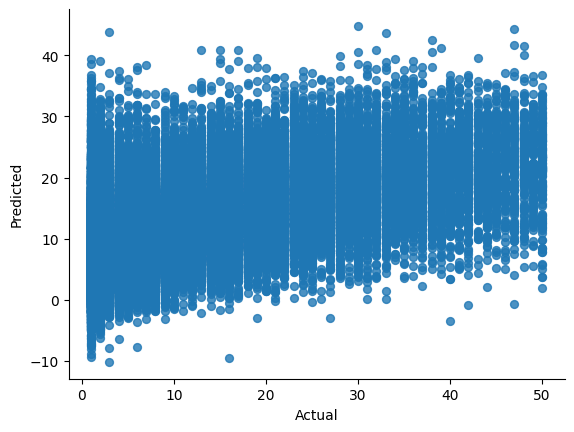

In [40]:
from matplotlib import pyplot as plt
results_df.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
!pip install matplotlib pandas xgboost


## Feature importance
SHAP is a game-theoretic approach to explain machine learning models, providing a summary plot of the relationship between features and model output. Features are ranked in descending order of importance, and impact/color describe the correlation between the feature and the target variable.

Generating SHAP feature importance is a very memory intensive operation, so to ensure that AutoML can run trials without running out of memory, we disable SHAP by default.
You can set the flag defined below to shap_enabled = True and re-run this notebook to see the SHAP plots.
To reduce the computational overhead of each trial, a single example is sampled from the validation set to explain.
For more thorough results, increase the sample size of explanations, or provide your own examples to explain.
SHAP cannot explain models using data with nulls; if your dataset has any, both the background data and examples to explain will be imputed using the mode (most frequent values). This affects the computed SHAP values, as the imputed samples may not match the actual data distribution.
For more information on how to read Shapley values, see the SHAP documen

In [44]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.3 MB/s eta 0:00:00


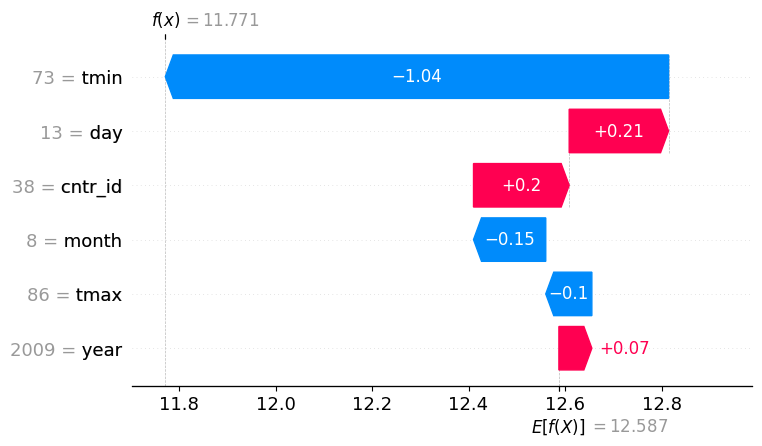

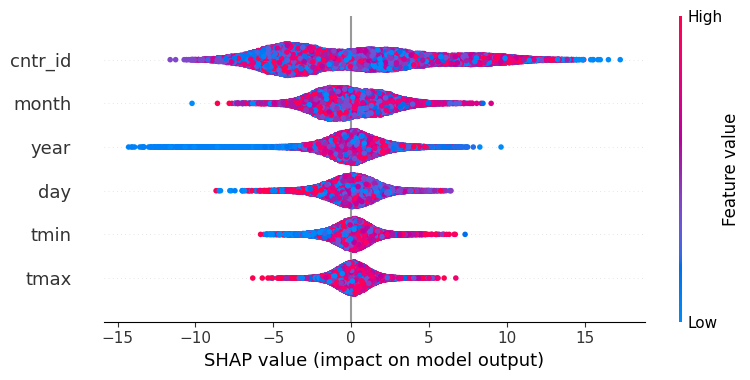

In [45]:
import shap

# Train your final model with the best parameters found
final_model = XGBRegressor(**best_params).fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(final_model)
shap_values = explainer(X_test)

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# For a global understanding, you can summarize the SHAP values in a plot
shap.summary_plot(shap_values, X_test)

# Download to CSV

In [46]:
# Convert DataFrame to CSV
results_df.to_csv('results.csv', index=False)  # Set index=False if you don't want the index in your file

# Use the google.colab library to download the file to your local computer
from google.colab import files
files.download('results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>